**Measuring Bias in recommender systems**

**Importing the data**

In [ ]:
!pip install holisticai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.8/272.8 kB 5.1 MB/s eta 0:00:00


The dataset contains a set of artists that were downloaded by users. It includes personal information about the user, specifically sex and country of origin. A user can download more than one artist. We will use the column "score", which contains only 1s for counting the interactions.

In [ ]:
# Imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from holisticai.datasets import load_last_fm

bunch = load_last_fm()
lastfm = bunch['frame']
lastfm['score'] = 1
lastfm

,user,artist,sex,country,score
0,1,red hot chili peppers,f,Germany,1
1,1,the black dahlia murder,f,Germany,1
2,1,goldfrapp,f,Germany,1
3,1,dropkick murphys,f,Germany,1
4,1,le tigre,f,Germany,1
...,...,...,...,...,...
289950,19718,bob dylan,f,Canada,1
289951,19718,pixies,f,Canada,1
289952,19718,the clash,f,Canada,1
289953,19718,a tribe called quest,f,Canada,1


To change the dataframe to an interaction matrix, where every row is a user and every column is an artist. We can use the formatting function provided in the library, the output dataframe can be used as an input to the bias metric functions for recommenders.

In [ ]:
# import formatters
from holisticai.utils import recommender_formatter

# Each interaction results in a non-nan entry in the dataframe.
df_pivot, p_attr = recommender_formatter(lastfm, users_col='user', groups_col='sex', items_col='artist', scores_col='score', aggfunc='mean')
df_pivot

artist,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,Edith piaf,...,weezer,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7
user,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


**Plotting and Data Exploration**

In [ ]:
# import plotters
from holisticai.bias.plots import group_pie_plot
from holisticai.bias.plots import long_tail_plot
from holisticai.bias.plots import exposure_diff_plot
from holisticai.bias.plots import exposure_ratio_plot

print ('Number of Unique Users : ' + str(df_pivot.shape[0]))
print ('Number of Unique Artists : ' + str(df_pivot.shape[1]))

Number of Unique Users : 15000
Number of Unique Artists : 1004


<Axes: >

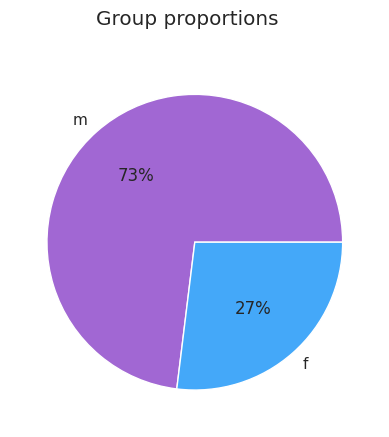

In [ ]:
# male vs female representation in data
group_pie_plot(lastfm['sex'])

<Axes: >

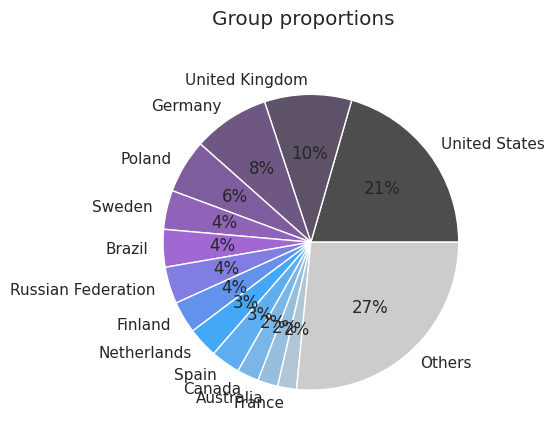

In [ ]:
# country representation in data
group_pie_plot(lastfm['country'])

long_tail_plot shows the descendent frequency of the items. In this example, the artists' popularity seems falls exponentially at a pretty fast rate. This can indicate an issue in terms of items fairness (i.e. if we want all artists to be recommended equally).

<Axes: xlabel='Items (sorted by popularity)', ylabel='Item Count'>

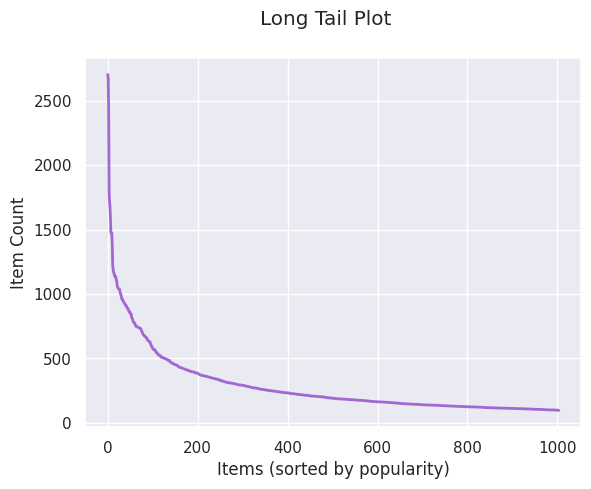

In [ ]:
# the long tail plot shows the distribution of item counts
long_tail_plot(df_pivot.to_numpy())

 we calculate the proportion of male users (out of all male users) who have downloaded each artist. We then compare this value to the corresponding proportion of female users.

exposure_diff_plot displays the difference in exposure for each item, while exposure_ratio_plot measures the ratio in exposure.

<Axes: xlabel='Items (sorted by exposure difference)', ylabel='$Exposure_a - Exposure_b$'>

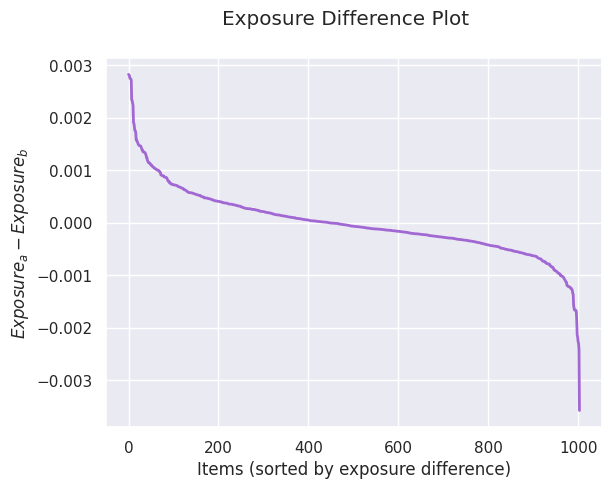

In [ ]:
# sorted exposure differences
group_a = p_attr=='f'
group_b = p_attr=='m'
exposure_diff_plot(group_a, group_b, df_pivot.to_numpy())

The differences in exposures seem to be overall quite small. However, since the number of items is quite large, the exposures are small to start with.

<Axes: xlabel='Items (sorted by exposure ratio)', ylabel='$Exposure_a/Exposure_b$'>

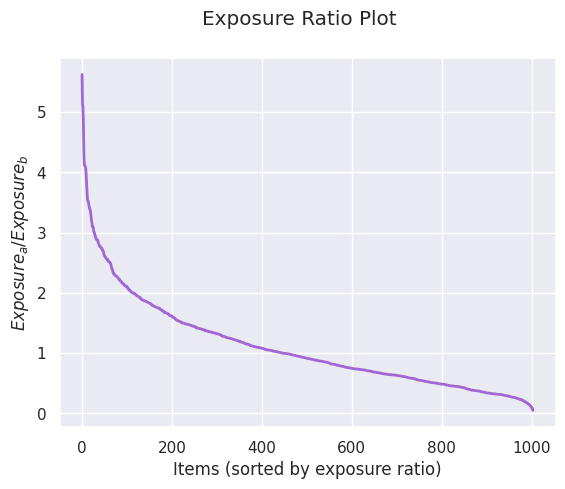

In [ ]:
# sorted exposure ratios
exposure_ratio_plot(group_a, group_b, df_pivot.to_numpy())

<Axes: xlabel='Items (sorted by exposure ratio)', ylabel='$Exposure_a/Exposure_b$'>

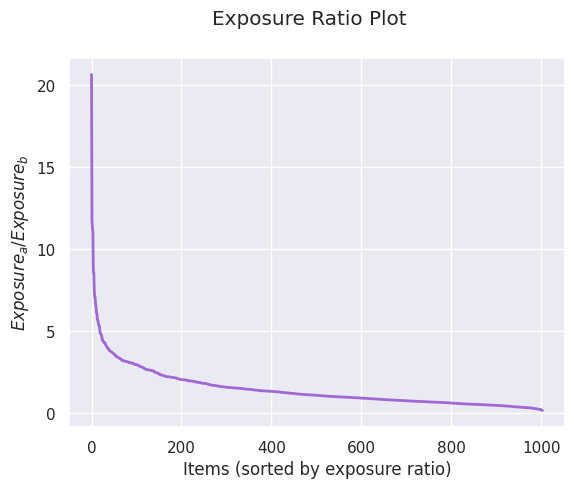

In [ ]:
exposure_ratio_plot(group_b, group_a, df_pivot.to_numpy())

The above plots show that there are artists that are more than 5 times more popular amongst the female subgroup than male, and artists that are more than 20 times more popular amongst male rather than female users.

**Train a Model**

To recommend artists to users we use item based collaborative filtering. For each artist, we work out a list of most similar artists. Then we recommend artists to users by looking at which artists they like, and choosing the most similar ones.

In [ ]:
index_to_artist = dict(zip(range(len(df_pivot.columns)),df_pivot.columns))
artist_to_index = dict(zip(df_pivot.columns,range(len(df_pivot.columns))))
user_gender_dict = dict(zip(df_pivot.index, p_attr))
data_matrix = df_pivot.fillna(0).to_numpy()
data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity between items matrix
cosine_sim = linear_kernel(data_matrix.T, data_matrix.T)

cosine_sim.shape

(1004, 1004)

In [ ]:
# Helper functions for display
def display_items(arr):
    return [index_to_artist[x] for x in arr]

# Items liked by a given user
def items_liked_by_user(data_matrix, u):
    return np.nonzero(data_matrix[u])[0]

display_items(items_liked_by_user(data_matrix, 9))

['mogwai',
 'my bloody valentine',
 'sonic youth',
 'stereolab',
 'the fall',
 'the kinks',
 'the radio dept.',
 'the velvet underground']

In [ ]:
def items_similar_to_item(similarity_matrix, i, k):
    arr = similarity_matrix[i]
    arr[i] = 0
    return np.argsort(arr)[-k:]

# Items similar to Mogwai
display_items(items_similar_to_item(cosine_sim, artist_to_index['mogwai'], 10))

['boards of canada',
 'muse',
 'pink floyd',
 'the beatles',
 'portishead',
 'coldplay',
 'death cab for cutie',
 'explosions in the sky',
 'sigur ros',
 'radiohead']

For each user we look at their liked items, then we create a list of similar items and choose the most frequent ones.

In [ ]:
def recommended_items(data_matrix, similarity_matrix, u, k):
    liked = items_liked_by_user(data_matrix, u)
    arr = np.sum(similarity_matrix[liked,:], axis=0)
    arr[liked] = 0
    return np.argsort(arr)[-k:]


display_items(recommended_items(data_matrix, cosine_sim, 590, 10))

['ac/dc',
 'green day',
 'foo fighters',
 'rammstein',
 'the killers',
 'led zeppelin',
 'muse',
 'radiohead',
 'red hot chili peppers',
 'coldplay']

In [ ]:
# Items similar to 2 Pac
display_items(items_similar_to_item(cosine_sim, artist_to_index['2pac'], 10))

['t.i.',
 'the game',
 'dr. dre',
 'notorious b.i.g.',
 '50 cent',
 'jay-z',
 'snoop dogg',
 'nas',
 'eminem',
 'kanye west']

In [ ]:
# Items similar to the beatles
display_items(items_similar_to_item(cosine_sim, artist_to_index['the beatles'], 10))

['nirvana',
 'queen',
 'the rolling stones',
 'david bowie',
 'led zeppelin',
 'red hot chili peppers',
 'bob dylan',
 'pink floyd',
 'coldplay',
 'radiohead']

In [ ]:
# Items similar to madonna
display_items(items_similar_to_item(cosine_sim, artist_to_index['madonna'], 10))

['u2',
 'nelly furtado',
 'amy winehouse',
 'depeche mode',
 'michael jackson',
 'kylie minogue',
 'the beatles',
 'rihanna',
 'britney spears',
 'coldplay']

In [ ]:
recommendations = [display_items(recommended_items(data_matrix, cosine_sim, u, 10)) for u in range(df_pivot.shape[0])]

recomendation_df = pd.DataFrame(recommendations, columns = range(1,11))

recomendation_df

,1,2,3,4,5,6,7,8,9,10
0,system of a down,led zeppelin,foo fighters,pink floyd,nirvana,metallica,muse,radiohead,the beatles,coldplay
1,modest mouse,sufjan stevens,death cab for cutie,muse,pink floyd,beck,bjork,sigur ros,coldplay,the beatles
2,the white stripes,death cab for cutie,david bowie,daft punk,nirvana,the killers,red hot chili peppers,coldplay,the beatles,radiohead
3,queen,linkin park,in flames,nirvana,led zeppelin,rammstein,the beatles,pink floyd,red hot chili peppers,system of a down
4,linkin park,foo fighters,system of a down,led zeppelin,the killers,nirvana,red hot chili peppers,the beatles,coldplay,radiohead
...,...,...,...,...,...,...,...,...,...,...
14995,evanescence,radiohead,metallica,daft punk,system of a down,the killers,moby,muse,red hot chili peppers,coldplay
14996,rammstein,in flames,muse,coldplay,pink floyd,radiohead,nirvana,system of a down,the beatles,metallica
14997,the rolling stones,nirvana,depeche mode,muse,pink floyd,the killers,red hot chili peppers,radiohead,coldplay,the beatles
14998,nelly furtado,muse,the beatles,lady gaga,the killers,avril lavigne,linkin park,rihanna,britney spears,coldplay


In [ ]:
def explode(arr, num_items):
    out = np.zeros(num_items)
    out[arr] = 1
    return out

new_recs = [explode(recommended_items(data_matrix, cosine_sim, u, 10), len(df_pivot.columns)) for u in range(df_pivot.shape[0])]

new_df_pivot = pd.DataFrame(new_recs, columns = df_pivot.columns)

new_df_pivot

artist,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,Edith piaf,...,weezer,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Evaluate Bias of Model**

**Item Fairness**

<Axes: xlabel='Items (sorted by popularity)', ylabel='Item Count'>

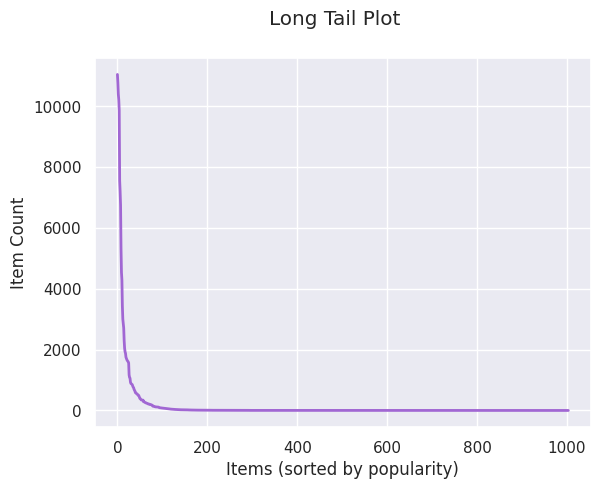

In [ ]:
mat = new_df_pivot.replace(0,np.nan).to_numpy()
group_a = p_attr=='f'
group_b = p_attr=='m'
# the long tail plot shows the distribution of item counts
long_tail_plot(mat)

The item bias has been increased very considerably by using collaborative filtering. This is easily seen by the shape of the above distribution.

In [ ]:
from holisticai.bias.metrics import aggregate_diversity
aggregate_diversity(mat)

0.4113545816733068

The above metric shows 40% of all artists are shown to at least one user.

In [ ]:
from holisticai.bias.metrics import gini_index
gini_index(mat)

0.9644235161183117

The Gini Index is used in the context of recommender systems as a measure of how unequal the distribution of exposure is over artists. A value of 0 would indicate perfect fairness, a flat distribution. A value of 1 would be maximally unequal. In this case the GINI Index is 0.96, indicating a VERY considerable amount of difference in exposures overall between different artists.

In [ ]:
from holisticai.bias.metrics import recommender_bias_metrics
recommender_bias_metrics(mat_pred=mat, metric_type='item_based')

,Value,Reference
Metric,,
Aggregate Diversity,0.411355,1
GINI index,0.964424,0
Exposure Distribution Entropy,3.812282,-
Average Recommendation Popularity,5716.980253,-


Above we have batch plotted all item_based metrics for recommender bias task. For instance observe the Average Recommendation Popularity is 5716, meaning that on average a user will be recommended an artist that has 5716 total interactions.

**User fairness - Equality of Outcome**

In [ ]:
from holisticai.bias.metrics import exposure_l1
exposure_l1(group_a, group_b, mat)

0.11064958985833381

Above we compute the total variation distance between the exposure distribution of males and females. The minimum value for this metric is 0 indicating the two subgroups are exposed to the artists in exactly the same way, the maximum value is 1 indicating a maximal separation in exposures between the two groups. In this case the value of 0.11 shows there is a difference between the recommendations to males and females, but not a drastic one.

**Bias measuring and mitigation in recommendation systems**

**1. Data loading and packages installation**

In [ ]:
from holisticai.datasets import load_last_fm

from holisticai.datasets.synthetic.recruitment import generate_rankings


The dataset is a synthetic ranking dataset generated. This algorithm creates a ranked output of protected and unprotected candidates with a certain probability.

generate_rankings function takes as arguments the number of k elements that will be generated for all the M lists under a probability p to be protected.

We generate only one ranked list of 20 elements.

In [ ]:
M = 1
k = 20
p = 0.1
ranking = generate_rankings(M, k, p)
ranking.head()

,X,Y,score,protected
0,0,20,20,False
1,0,19,19,False
2,0,18,18,False
3,0,17,17,False
4,0,16,16,False


To add bias into the dataset we will modify the protected column where the protected elements will be only the last six elements.

In [ ]:
def create_unfair_example(ranking, n):
    """
    Setting an unfair ranking where protected group examples are only the last n results.
    """
    ranking = ranking.copy()
    ranking['protected']=False
    ranking['protected'].iloc[-n:]=True
    return ranking

unfair_ranking = create_unfair_example(ranking, 6)

In [ ]:
unfair_ranking

,X,Y,score,protected
0,0,20,20,False
1,0,19,19,False
2,0,18,18,False
3,0,17,17,False
4,0,16,16,False
5,0,15,15,False
6,0,14,14,False
7,0,13,13,False
8,0,12,12,False
9,0,11,11,False


In [ ]:
#create a new synthetic dataset to fit the mitigator used for the unfair dataset
# Synthetic data
M = 1000
top_n = 20
p = 0.25
rankings = generate_rankings(M, top_n, p, return_p_attr=False)


unfair_ranking.describe()


,X,Y,score
count,20.0,20.00000,20.00000
mean,0.0,10.50000,10.50000
std,0.0,5.91608,5.91608
min,0.0,1.00000,1.00000
25%,0.0,5.75000,5.75000
50%,0.0,10.50000,10.50000
75%,0.0,15.25000,15.25000
max,0.0,20.00000,20.00000


In [ ]:
rankings.describe()

,X,Y,score
count,20000.000000,20000.000000,20000.000000
mean,499.500000,10.500000,10.500000
std,288.682207,5.766425,5.766425
min,0.000000,1.000000,1.000000
25%,249.750000,5.750000,5.750000
50%,499.500000,10.500000,10.500000
75%,749.250000,15.250000,15.250000
max,999.000000,20.000000,20.000000


**3. Dataset preprocessing**

To change the dataframe to an interaction matrix, where every row is a user and every column is an artist we can use the recommender_formatter function provided in the library which makes this transformation, then, the output dataframe can be used as an input to the bias metric functions for recommenders.

<Axes: >

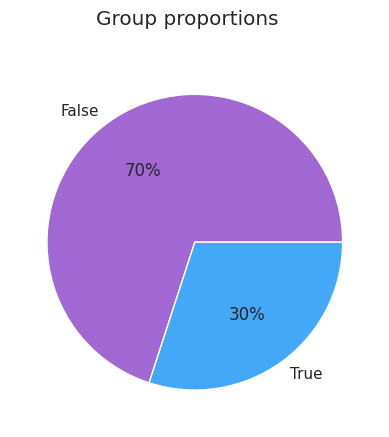

In [ ]:
from holisticai.bias.plots import group_pie_plot, frequency_plot

group_pie_plot(unfair_ranking['protected'])

This graph show us that the proportion of the unprotected group is very high compared to the protected examples for the unfair dataset.

<Axes: >

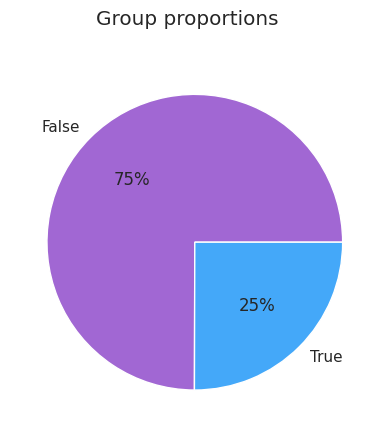

In [ ]:
group_pie_plot(rankings['protected'])

A similar proportion is observed for the syntetic dataset, where the protected examples are only the 25% of the total data.

**3. Bias measuring**

exposure_metric function calculates the exposure ratio and difference from the actual rankings for both datasets.

In [ ]:
from holisticai.bias.mitigation.postprocessing.debiasing_exposure.algorithm_utils import exposure_metric


baseline = exposure_metric(rankings, group_col='protected', query_col='X', score_col='score')
baseline


,Value
exposure_ratio,7541.959607
exposure difference,0.046102


In [ ]:
baseline_unfair = exposure_metric(unfair_ranking, group_col='protected', query_col='X', score_col='score')
baseline_unfair

,Value
exposure_ratio,516682.109793
exposure difference,0.103049


**Exposure ratio:** Calculates the relation between the exposure of non-protected and protected elements from the dataset. For a fairer model we seek to have this value lower, indicating that the protected examples are gaining more exposure.

**Exposure difference:** Calculates the difference of exposure between the two groups this value will be zero when the protected group achieves more exposure than the non-protected.


**4. Bias mitigation**

**Pre-processing: Disparate Impact Remover RS**

"Disparate impact remover RS" method is a preprocessing algorithm that edits feature values to increase group fairness while preserving rank-ordering within groups.

In [ ]:
from holisticai.bias.mitigation import DisparateImpactRemoverRS

dir = DisparateImpactRemoverRS(query_col='X', group_col='protected', score_col='score', repair_level=1)


**5. Compare results**

In [ ]:
re_rankings = dir.transform(rankings)

In [ ]:
df_dis_imp = exposure_metric(re_rankings, group_col='protected', query_col='X', score_col='score')
df_dis_imp

,Value
exposure_ratio,1.007237
exposure difference,0.002136


In [ ]:
re_ranking = dir.transform(unfair_ranking)


df_dis_imp_unfair = exposure_metric(re_ranking, group_col='protected', query_col='X', score_col='score')
df_dis_imp_unfair


,Value
exposure_ratio,0.962027
exposure difference,0.000000


In [ ]:
result = pd.concat([baseline, df_dis_imp], axis=1).iloc[:, [0,1]]
result.columns = ['Baseline','Mitigator']
result

,Baseline,Mitigator
exposure_ratio,7541.959607,1.007237
exposure difference,0.046102,0.002136


In [ ]:
result = pd.concat([baseline_unfair, df_dis_imp_unfair], axis=1).iloc[:, [0,1]]
result.columns = ['Baseline','Mitigator']
result


,Baseline,Mitigator
exposure_ratio,516682.109793,0.962027
exposure difference,0.103049,0.000000


this method allows us to set a repair_level value which is a parameter to control the repair amount, where 0 means no repair while 1 is full repair.

In [ ]:
def calculate_metrics(data_matrix_, repair_level, metrics_cols):
  dir = DisparateImpactRemoverRS(query_col='X', group_col='protected', score_col='score', repair_level=repair_level)
  new_ranking_ = dir.transform(data_matrix_)
  df = exposure_metric(new_ranking_, group_col='protected', query_col='X', score_col='score')
  # Calculate metrics
  metrics = [
      repair_level,
  ]
  metrics.extend([df['Value'].loc[col] for col in metrics_cols])
  return metrics


metrics_val = []
metrics_cols = ["exposure_ratio", "exposure difference"]

for repair_values in np.linspace(0,1,6):
  metrics_val.append(calculate_metrics(unfair_ranking, repair_values, metrics_cols))

metrics = ['repair_level']
metrics.extend(metrics_cols)
df_metrics = pd.DataFrame(metrics_val, columns=metrics)
df_metrics

,repair_level,exposure_ratio,exposure difference
0,0.0,516682.109793,0.103049
1,0.2,27926.612806,0.103044
2,0.4,2200.646756,0.102983
3,0.6,190.992596,0.102281
4,0.8,15.232911,0.093650
5,1.0,0.962027,0.000000


Text(0.5, 0, 'Gamma')

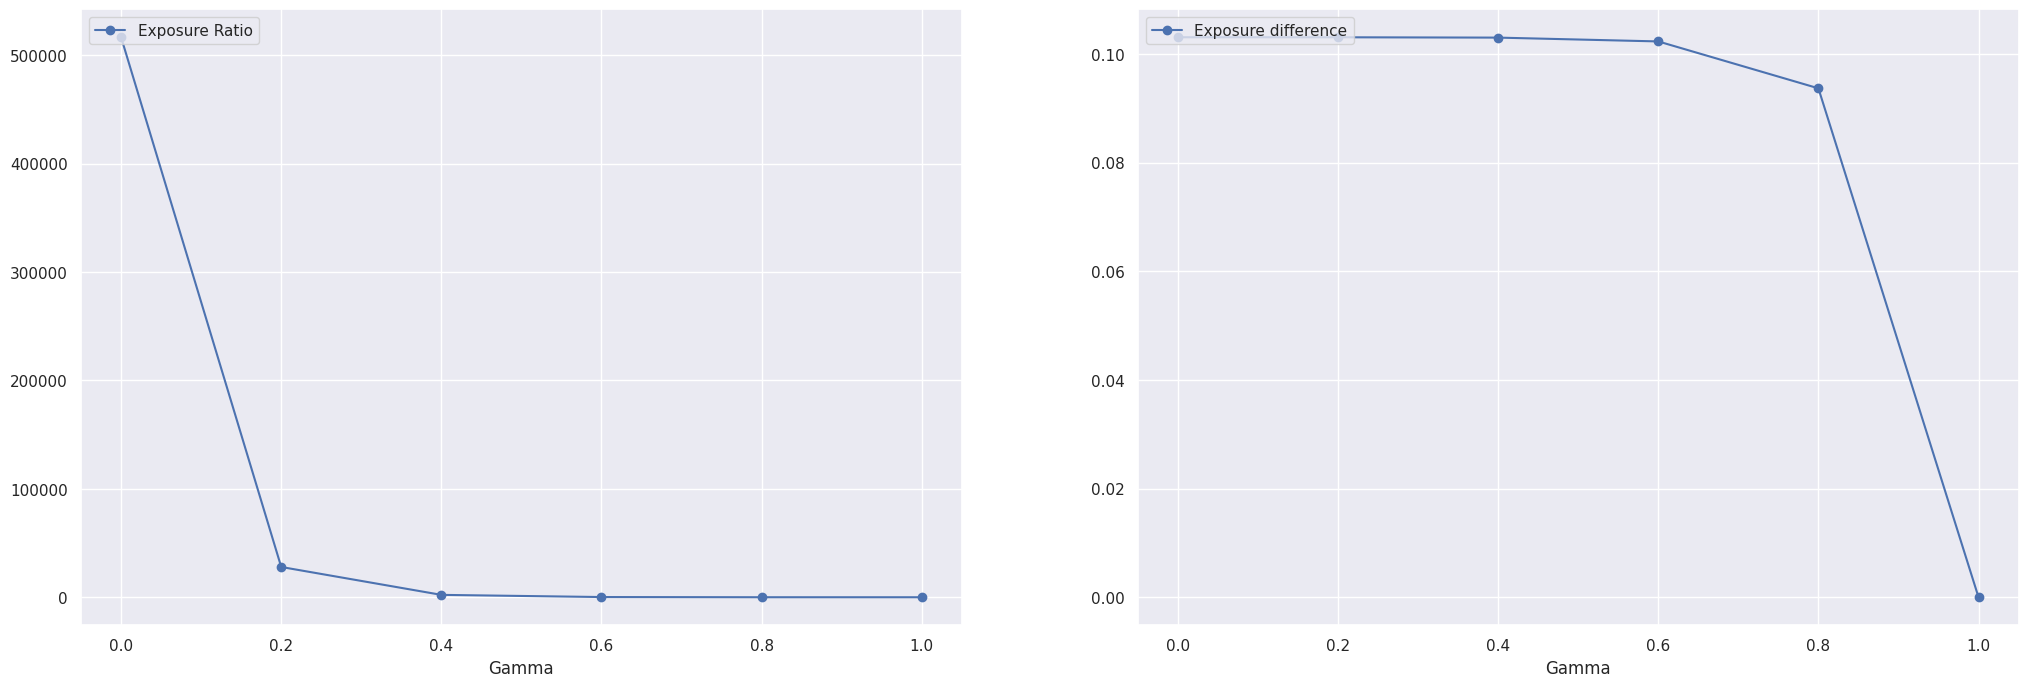

In [ ]:
import matplotlib.pyplot as plt
x_axis = df_metrics.repair_level
plt.figure(figsize=(25,8))
plt.subplot(121)
plt.plot(x_axis, df_metrics['exposure_ratio'], 'o-', label='Exposure Ratio')
plt.legend(loc='upper left')
plt.xlabel('Gamma')
plt.subplot(122)
plt.plot(x_axis, df_metrics['exposure difference'], 'o-', label='Exposure difference')
plt.legend(loc='upper left')
plt.xlabel('Gamma')

as the repair_value parameter increases, we get a better model in terms of fairness

**Dataset :** Spotify music

**danceability**
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**key**
The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

**loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**mode**
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness**
Speechiness detects the presence of spoken words in a track.

**acousticness**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**instrumentalness**
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context.

**liveness**
Detects the presence of an audience in the recording.

**valence**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

**tempo**
The overall estimated tempo of a track in beats per minute (BPM)

**duration_ms**
The duration of the track in milliseconds.

**time_signature**
An estimated overall time signature of a track.

**liked**
1 for liked songs , 0 for disliked songs

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from holisticai.datasets import load_last_fm

df=pd.read_csv("/content/data.csv")
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [ ]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

<Axes: >

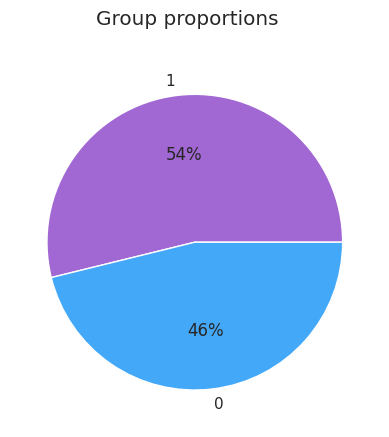

In [ ]:
from holisticai.bias.plots import group_pie_plot, frequency_plot

group_pie_plot(df['mode'])

In [ ]:
from holisticai.bias.mitigation.postprocessing.debiasing_exposure.algorithm_utils import exposure_metric


baseline = exposure_metric(df, group_col='mode', query_col='key', score_col='liked')
baseline

,Value
exposure_ratio,1.026794
exposure difference,0.012704


**Pre-processing: Disparate Impact Remover RS**

In [ ]:
from holisticai.bias.mitigation import DisparateImpactRemoverRS

dir = DisparateImpactRemoverRS(query_col='key', group_col='mode', score_col='liked', repair_level=1)


In [ ]:
re_rankings = dir.transform(df)

In [ ]:
df_dis_imp = exposure_metric(re_rankings, group_col='mode', query_col='key', score_col='liked')
df_dis_imp

,Value
exposure_ratio,1.044352
exposure difference,0.012704


In [ ]:
result = pd.concat([baseline, df_dis_imp], axis=1).iloc[:, [0,1]]
result.columns = ['Baseline','Mitigator']
result

,Baseline,Mitigator
exposure_ratio,1.026794,1.044352
exposure difference,0.012704,0.012704


In [ ]:
def calculate_metrics(data_matrix_, repair_level, metrics_cols):
  dir = DisparateImpactRemoverRS(query_col='key', group_col='mode', score_col='liked', repair_level=repair_level)
  new_ranking_ = dir.transform(data_matrix_)
  df = exposure_metric(new_ranking_, group_col='mode', query_col='key', score_col='liked')
  # Calculate metrics
  metrics = [
      repair_level,
  ]
  metrics.extend([df['Value'].loc[col] for col in metrics_cols])
  return metrics


metrics_val = []
metrics_cols = ["exposure_ratio", "exposure difference"]

for repair_values in np.linspace(0,1,6):
  metrics_val.append(calculate_metrics(df, repair_values, metrics_cols))

metrics = ['repair_level']
metrics.extend(metrics_cols)
df_metrics = pd.DataFrame(metrics_val, columns=metrics)
df_metrics

,repair_level,exposure_ratio,exposure difference
0,0.0,1.026794,0.012704
1,0.2,1.026794,0.012704
2,0.4,1.026794,0.012704
3,0.6,1.044352,0.012704
4,0.8,1.044352,0.012704
5,1.0,1.044352,0.012704


Text(0.5, 0, 'Gamma')

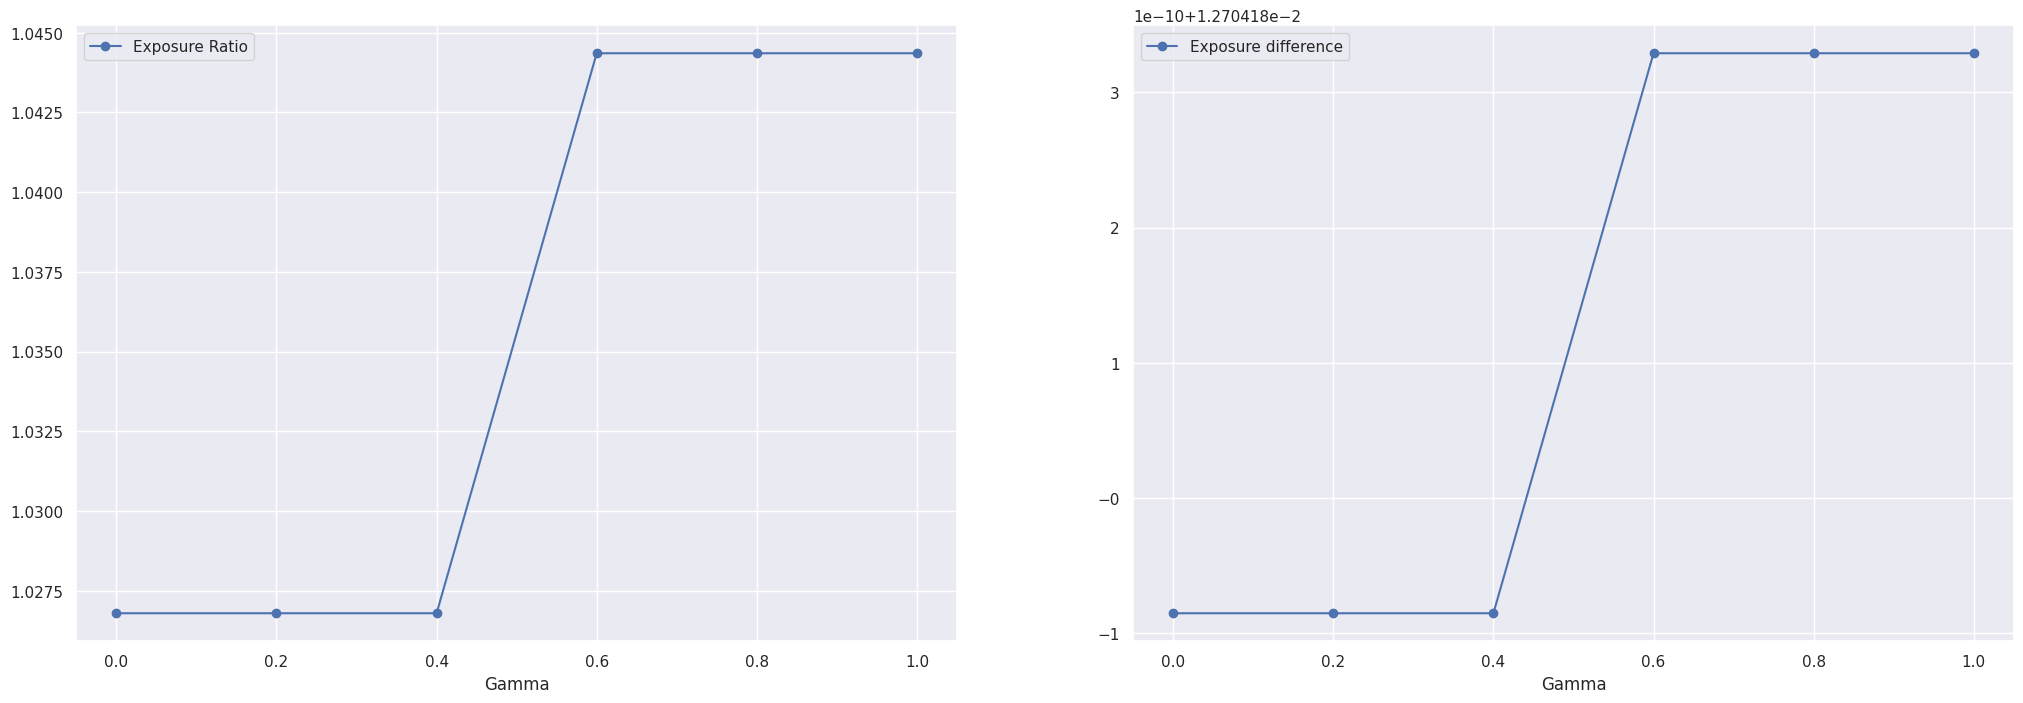

In [ ]:
import matplotlib.pyplot as plt
x_axis = df_metrics.repair_level
plt.figure(figsize=(25,8))
plt.subplot(121)
plt.plot(x_axis, df_metrics['exposure_ratio'], 'o-', label='Exposure Ratio')
plt.legend(loc='upper left')
plt.xlabel('Gamma')
plt.subplot(122)
plt.plot(x_axis, df_metrics['exposure difference'], 'o-', label='Exposure difference')
plt.legend(loc='upper left')
plt.xlabel('Gamma')